In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [4]:
df2 = df1.drop(['area_type', 'availability', 'society'], axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df2.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df2.shape

(13320, 6)

In [7]:
df2.dropna(inplace=True)
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# BHK and Bedroom are same things so I am keeping only number and removing string.

In [8]:
df2['BHK'] = df2['size'].apply(lambda x: float(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [9]:
df2.BHK.unique()

array([ 2.,  4.,  3.,  1.,  6.,  8.,  7.,  5., 11.,  9., 27., 43., 14.,
       12., 10., 13.])

In [10]:
df2 = df2.drop('size', axis='columns')
df2.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Kothanur,1200,2.0,1.0,51.00,2.0


In [11]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [12]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def convert_sqft(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [14]:
convert_sqft('123 - 125')

124.0

In [15]:
df2['total_sqft'] = df2.total_sqft.apply(convert_sqft)
df2.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0


In [16]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [17]:
df2[~df2.total_sqft.apply(is_float)]

,location,total_sqft,bath,balcony,price,BHK


In [18]:
df2[~df2.bath.apply(is_float)]

,location,total_sqft,bath,balcony,price,BHK


In [19]:
df2[~df2.balcony.apply(is_float)]

,location,total_sqft,bath,balcony,price,BHK


In [20]:
df2[~df2.price.apply(is_float)]

,location,total_sqft,bath,balcony,price,BHK


# Adding price_per_sqft column (Note that actual price is in lacs)

In [21]:
df2['price_per_sqft'] = (df2.price*100000)/(df2.total_sqft)
df2.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [22]:
len(df2.location.unique())

1265

In [23]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              514
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          261
Thanisandra             231
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1265, dtype: int64

In [24]:
location_stats[location_stats<=10]

location
Kalkere                  10
Dairy Circle             10
Nagappa Reddy Layout     10
Ganga Nagar              10
1st Block Koramangala    10
                         ..
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1028, dtype: int64

In [25]:
loc_stats_less_than_10 = location_stats[location_stats<=10]
loc_stats_less_than_10

location
Kalkere                  10
Dairy Circle             10
Nagappa Reddy Layout     10
Ganga Nagar              10
1st Block Koramangala    10
                         ..
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1028, dtype: int64

In [26]:
df2['location'] = df2.location.apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)
len(df2.location.unique())

238

In [27]:
df2.head(15)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2.0,3247.863248
8,Marathahalli,1310.0,3.0,1.0,63.25,3.0,4828.244275
10,Whitefield,1800.0,2.0,2.0,70.00,3.0,3888.888889
11,Whitefield,2785.0,5.0,3.0,295.00,4.0,10592.459605
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2.0,3800.000000


#Area should be more than 300 per BHK if it is less than that consider it as outlier

In [28]:
df2[df2.total_sqft/df2.BHK<300].head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6.0,10660.980810
68,other,1350.0,7.0,0.0,85.0,8.0,6296.296296
70,other,500.0,3.0,2.0,100.0,3.0,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2.0,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6.0,22535.211268


In [29]:
df2.shape

(12710, 7)

In [30]:
df3 = df2[~(df2.total_sqft/df2.BHK<300)]
df3.shape

(12055, 7)

In [31]:
def remove_pps_outlier(df):
  df_out = pd.DataFrame()
  for key, sub_df in df.groupby('location'):
    m = np.mean(sub_df.price_per_sqft)
    s = np.std(sub_df.price_per_sqft)
    reduced_df = sub_df[(sub_df.price_per_sqft>(m-s)) & (sub_df.price_per_sqft<=(m+s))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

In [32]:
df4 = remove_pps_outlier(df3)
df4.shape

(9849, 7)

In [33]:
import matplotlib.pyplot as plt

In [34]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location==location) & (df.BHK==2)]
  bhk3 = df[(df.location==location) & (df.BHK==3)]
  plt.title(location)
  plt.xlabel('Area in sqft')
  plt.ylabel('Price')
  plt.scatter(bhk2.total_sqft, bhk2.price)
  plt.scatter(bhk3.total_sqft, bhk3.price)
  plt.legend(['BHK2', 'BHK3'])
  plt.show()


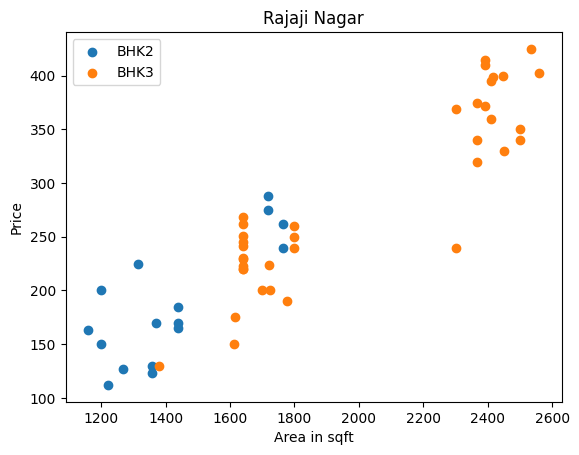

In [35]:
plot_scatter_chart(df4, 'Rajaji Nagar')

In [36]:
def remove_bhk_outlier(df):
  excluding_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    count = 0
    for bhk, bhk_df in location_df.groupby('BHK'):
      bhk_stats[count] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
      count+=1
    for bhk, bhk_df in location_df.groupby('BHK'):
      if bhk in bhk_stats:
        stats = bhk_stats[int(bhk)-1]
        if stats and stats['count']>5:
          excluding_indices = np.append(excluding_indices, bhk_df[bhk_df.price_per_sqft< stats['mean']].index.values
                                                                )
  return df.drop(excluding_indices, axis='index')

In [37]:
df5 = remove_bhk_outlier(df4)
df5.shape

(5885, 7)

In [38]:
df6 = df5[df5.bath<df5.BHK+2]
df6.shape

(5812, 7)

In [39]:
df6.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3.0,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3.0,4561.403509


In [40]:
df6 = df6.drop(['balcony', 'price_per_sqft'], axis='columns')
df6.shape

(5812, 5)

In [41]:
df6.head()

,location,total_sqft,bath,price,BHK
0,Devarachikkanahalli,1250.0,2.0,44.0,3.0
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
df6['locations']=le.fit_transform(df6.location)
df6.head()

,location,total_sqft,bath,price,BHK,locations
0,Devarachikkanahalli,1250.0,2.0,44.0,3.0,0
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,0


In [44]:
x = df6.drop(['location', 'price'], axis='columns')
x.head()

,total_sqft,bath,BHK,locations
0,1250.0,2.0,3.0,0
1,1250.0,2.0,2.0,0
2,1200.0,2.0,2.0,0
3,1170.0,2.0,2.0,0
4,1425.0,2.0,3.0,0


In [45]:
y = df6.price
y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=10)
x_train.shape

(4649, 4)

#Which model to use?

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [59]:
model_selection = {
    'linear_regression':{
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'n_jobs': [0, 5, 10, 50, 100]

        }
    },
    'Lasso':{
        'model': Lasso(),
        'params': {
            'alpha' : [1, 10, 50, 100],
            'tol': [0.0001, 0.001, 0.01],
            'selection': ['cyclic', 'random']
        }
    },
    'Ridge':{
        'model': Ridge(),
        'params':{
            'alpha' : [1, 10, 50, 100],
            'tol': [0.0001, 0.001, 0.01]
        }
    }
}

In [60]:
scores = []
for name, model in model_selection.items():
  m = GridSearchCV(model['model'], model['params'], cv=5)
  m.fit(x_train, y_train),
  scores.append({
      'model':name,
      'best_score': m.best_score_,
      'best_params':m.best_params_
  })

pd.DataFrame(scores)

,model,best_score,best_params
0,linear_regression,0.680902,"{'fit_intercept': True, 'n_jobs': 0}"
1,Lasso,0.679834,"{'alpha': 1, 'selection': 'random', 'tol': 0.001}"
2,Ridge,0.680937,"{'alpha': 50, 'tol': 0.0001}"


#From above statistics we conclude that we should use LinearRegression with default parameters.

In [61]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
scores=cross_val_score(model, x_train, y_train, cv=5)
scores

array([0.6354056 , 0.71687013, 0.64231912, 0.67358003, 0.73633735])

In [64]:
scores.mean()

0.6809024471111293

In [65]:
model.score(x_test, y_test)

0.6624564884960891

In [66]:
x.head()

,total_sqft,bath,BHK,locations
0,1250.0,2.0,3.0,0
1,1250.0,2.0,2.0,0
2,1200.0,2.0,2.0,0
3,1170.0,2.0,2.0,0
4,1425.0,2.0,3.0,0


In [67]:
df6.head()

,location,total_sqft,bath,price,BHK,locations
0,Devarachikkanahalli,1250.0,2.0,44.0,3.0,0
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,0


In [87]:
def model_prediction(sqft, bath, bhk, location):
  if df6[df6.location==location].shape[0]>0: # if this location exists
    label_number = df6[df6.location==location].locations.iloc[0] #take first index number
    return model.predict([[sqft, bath, bhk, label_number]])
  else:
    return model.predict([[sqft, bath, bhk, -1]])

In [96]:
model_prediction(1000, 2,2,'5th Phase JP Nagar')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.25512291])

In [97]:
model_prediction(1000, 4,4,'5th Phase JP Nagar')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.31877894])

In [89]:
df6.location.unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [98]:
import pickle

In [99]:
with open('Bengaluru House Pricing Model', 'wb') as f:
  pickle.dump(model, f)

In [100]:
import json
columns = {'data_columns': [col.lower() for col in x.columns]}
with open('column_names', 'w') as f:
  f.write(json.dumps(columns))